In [153]:
# Utilizzare NumPy per generare una serie temporale
# di 305 giorni di dati, simulando il numero di visitatori giornalieri in
# un ospedale. Assumere che il numero medio di visitatori sia 1200 con una
# deviazione standard di 900. Inoltre, aggiungere un trend decrescente nel
# tempo per simulare l'aumento della popolarità del parco.

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Dati iniziali
giorni = np.random.randint(150,366)
media_visitatori = 1200
deviazione_standard = 900


In [137]:
#Serie temporale dei visitatori
visitatori_giornalieri = np.random.normal(loc = media_visitatori, scale = deviazione_standard, size = giorni).astype(int)
visitatori_giornalieri = np.maximum(0, visitatori_giornalieri)

In [138]:
#Aggiunta trend decrescente
trend_decrescente = np.linspace(0, -300, giorni).astype(int)
visitatori_con_trend = visitatori_giornalieri + trend_decrescente
visitatori_con_trend = np.maximum(0, visitatori_con_trend)

In [139]:
print(visitatori_giornalieri)


[1335  647 1909 1783 1888  334  451 1080 1452  512 1797 2087 2329  595
 1279  985 2295 2508 1445 1860    0 1615  661 1165 1485 1262 2952  247
 2350 2108  774 1417 2026 2888  791    0  472 1795 2035 1032 2578 1862
 1957  405  380    0    0    0  539 1277  531 1562 2599  890    0    0
    0  471 1760  657 1251 2669  453 1495  957  246 1016 2005 1195 2540
    0  282 1470 1931  622 2112  200 1798 2625 1540  128 2049 2600 1033
 1523 2040 1608    0    0 1993 1774 2131 2467 2708 3415    0  348 1972
 2345    0 1629 1458 1175 1393  571 2774 1713 1533 2038  115 2166 1635
  505 1269 1795 1389 1148  837  111  753  561  764   17  785    0  618
 1116 2811  555 1133    0 1147  649  490 1731 1591    0  795  717 1679
 1338  539  240 1910 3381 1456  686 1441 1534 1472  566 1349 1844 1294
  660 1244 1961  525   93 1743 1327 1659 1897 1961 1895  631 1598 2353
 1678  661 1272    0  430 3607    0 1333 1212 3091  720 1128 2961 2276
 1579 2222    0  711  928  201 1939 2188  819 1094 2325 2339  981  911
 1128 

In [140]:
print(visitatori_con_trend)

[1335  646 1907 1780 1884  329  445 1073 1444  503 1787 2076 2317  582
 1265  970 2279 2491 1427 1841    0 1594  639 1142 1461 1237 2926  220
 2322 2079  744 1386 1994 2855  757    0  436 1758 1997  993 2538 1821
 1915  362  336    0    0    0  491 1228  481 1511 2547  837    0    0
    0  414 1702  598 1191 2608  391 1432  893  181  950 1938 1127 2471
    0  211 1398 1858  548 2037  124 1721 2547 1461   48 1968 2518  950
 1439 1955 1522    0    0 1904 1684 2040 2375 2615 3321    0  252 1875
 2247    0 1529 1357 1073 1290  467 2669 1607 1426 1930    6 2056 1524
  393 1156 1681 1274 1032  720    0  634  441  643    0  662    0  493
  990 2684  427 1004    0 1016  517  357 1597 1456    0  658  579 1540
 1198  398   98 1767 3237 1311  540 1294 1386 1323  416 1198 1692 1141
  506 1089 1805  368    0 1584 1167 1498 1735 1798 1731  466 1432 2186
 1510  492 1102    0  258 3434    0 1158 1036 2914  542  949 2781 2095
 1397 2039    0  526  742   14 1751 1999  629  903 2133 2146  787  716
  932 

In [141]:
# Creare un DataFrame pandas con le date come
# indice e il numero di visitatori come colonna e una collonna casuale
# della patologia scelta fra 3(ossa, cuore, testa ).

In [142]:
#colonna date 
date = pd.date_range(start="2023-01-01", periods=giorni, freq="D")

#colonna patologie
patologie = np.random.choice(["ossa", "cuore", "testa"], size=giorni)

In [143]:
#Creazione DataFrame
df = pd.DataFrame(index = date, data={'Visitatori': visitatori_con_trend, 'Patologia': patologie})

#Imposto il valore none alla colonna patologie per le righe con zero visitatori
df.loc[df['Visitatori'] == 0, 'Patologia'] = None

In [144]:
#Visualizzo il DataFrame
df

,Visitatori,Patologia
2023-01-01,1335,cuore
2023-01-02,646,ossa
2023-01-03,1907,ossa
2023-01-04,1780,testa
2023-01-05,1884,cuore
...,...,...
2023-10-23,799,ossa
2023-10-24,1507,testa
2023-10-25,1023,cuore
2023-10-26,1209,testa


In [145]:
#Calcolare il numero medio di visitatori per mese e la
#deviazione standard e quale patologia è più e quale meno trovata.

In [146]:
def media_visitatori(df):
    media = df['Visitatori'].mean()
    return media


print(media_visitatori(df))

1166.7333333333333


In [147]:
def deviazione_standard(df):
    deviazione_standard = df['Visitatori'].std()
    return deviazione_standard

print(deviazione_standard(df))


814.0869368139945


In [148]:
#Patologia più e meno trovata
def patologia_piu_trovata(df):
    patologia_piu_trovata = df['Patologia'].value_counts().idxmax()
    return patologia_piu_trovata

def patologia_meno_trovata(df):
    patologia_meno_trovata = df['Patologia'].value_counts().idxmin()
    return patologia_meno_trovata


print("La patologia più trovata è ",patologia_piu_trovata(df))

print("La patologia meno trovata è", patologia_meno_trovata(df))

La patologia più trovata è  testa
La patologia meno trovata è ossa


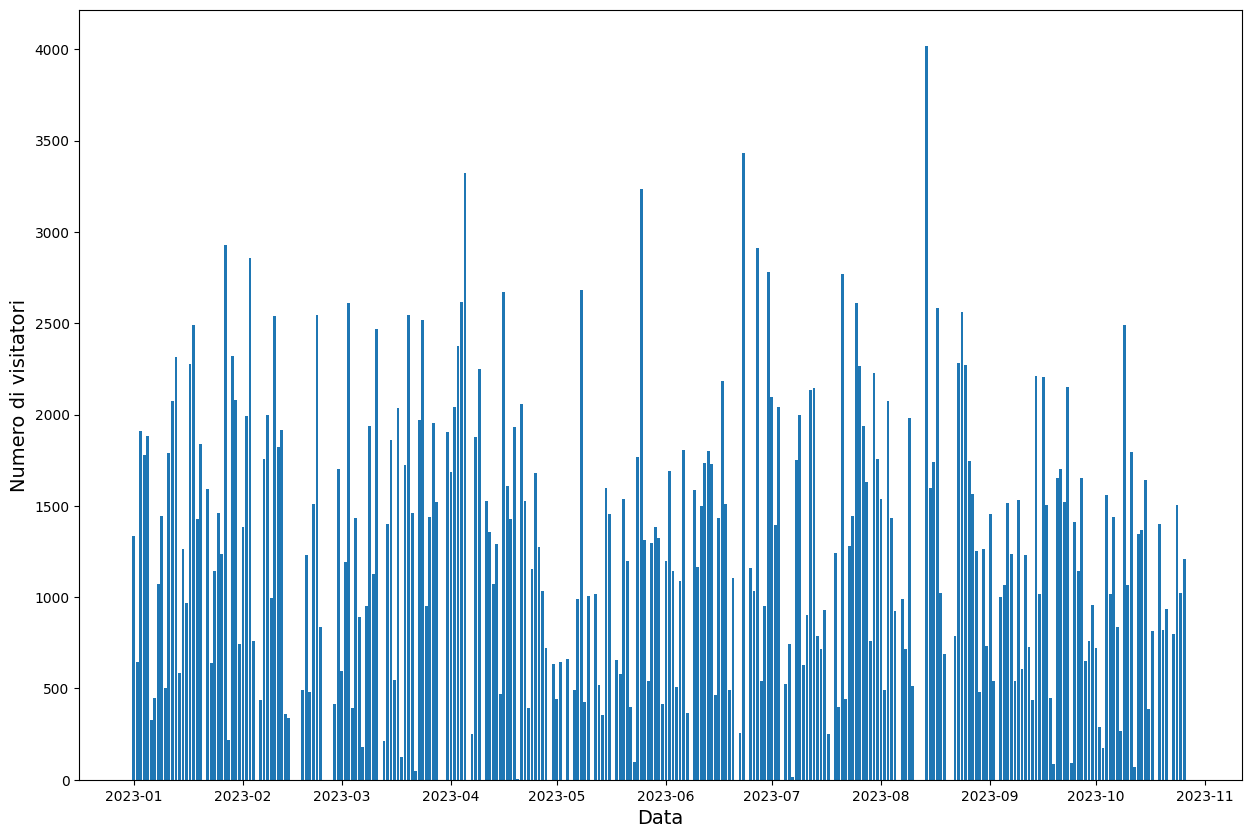

In [149]:
#Grafico a linee per il numero di vistatori giornaliero
plt.figure(figsize=(15,10))
plt.bar(df.index,df["Visitatori"], label = 'Visitatori totali per giorno')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Numero di visitatori', fontsize= 14)
plt.show()

In [150]:
#media mensile del numero di visitatori
media_mensile = df.groupby(df.index.month)["Visitatori"].mean()

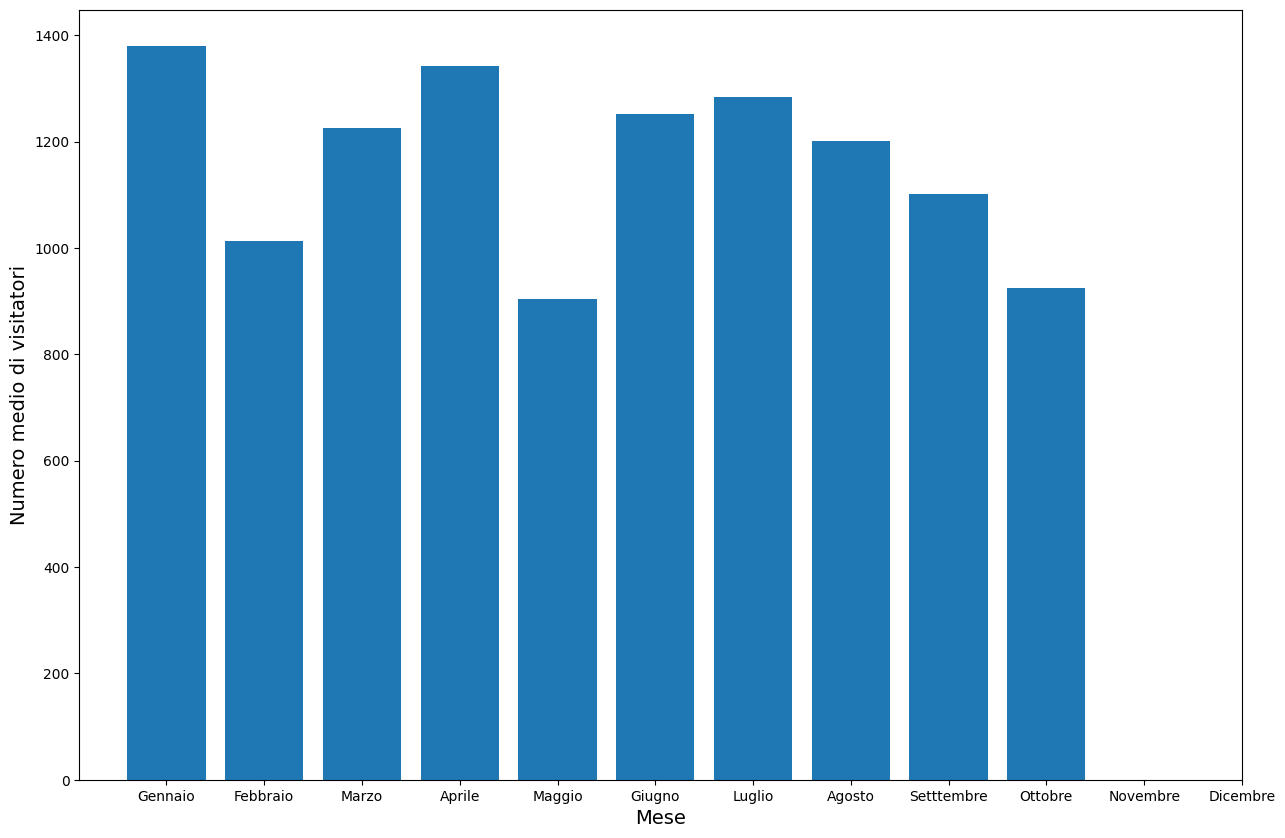

In [151]:
plt.figure(figsize=(15,10))
plt.bar(media_mensile.index, media_mensile, label = 'Media mensile dei visitatori')
plt.xlabel('Mese', fontsize=14)
plt.ylabel('Numero medio di visitatori', fontsize= 14)
plt.xticks(np.arange(1, 13), ["Gennaio", "Febbraio", "Marzo", "Aprile", "Maggio", "Giugno", "Luglio", "Agosto", "Setttembre","Ottobre","Novembre","Dicembre"])
plt.show()

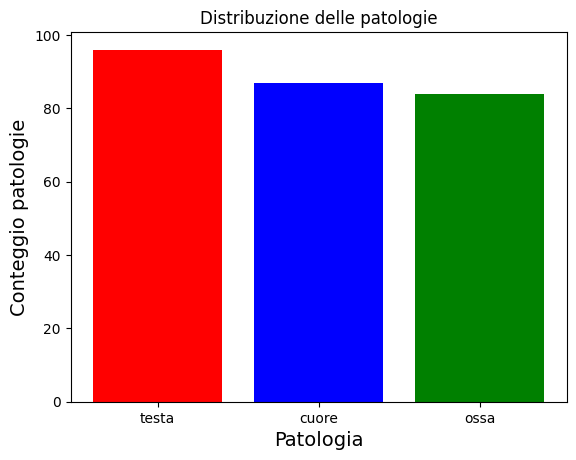

In [152]:
#Grafico per le tre patologie

#Conto ciascuna patologia
conteggio_patologie = df["Patologia"].value_counts()

#print(conteggio_patologie)


plt.bar(conteggio_patologie.index, conteggio_patologie.values, color=['red', 'blue', 'green'])


plt.xlabel('Patologia', fontsize=14)
plt.ylabel('Conteggio patologie', fontsize= 14)
plt.title('Distribuzione delle patologie')
plt.xticks(rotation = 0)
plt.show()